## Model Creation and Evaluation

In [1]:
%%capture
#Load data_selection-engineering file
%run data_selection-engineering.ipynb

### Train Test Split

In [2]:
def model_evaluation(model, features):
    #Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)
    #Create the model
    model = model
    model.fit(X_train, y_train)
    #Make prediction
    y_pred = model.predict(X_test)

    #Model evaluation
    #Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("#####################################################")
    #Generate a classification report
    print("Classification Report")
    report  = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)
    df = pd.DataFrame(report).T
    print(df)
    print("#####################################################")
    #Create a confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion)

#### Logistic Regression Model 

##### Using all Independent Variables

In [3]:
model_evaluation(LogisticRegression(), X)

Accuracy: 0.7990521327014218
#####################################################
Classification Report
              precision    recall  f1-score      support
Class 0        0.839879  0.897353  0.867665  1549.000000
Class 1        0.650549  0.527629  0.582677   561.000000
accuracy       0.799052  0.799052  0.799052     0.799052
macro avg      0.745214  0.712491  0.725171  2110.000000
weighted avg   0.789541  0.799052  0.791894  2110.000000
#####################################################
Confusion Matrix:
[[1390  159]
 [ 265  296]]


##### Using Selected Variables with Stepwise selection

In [4]:
model_evaluation(LogisticRegression(), dataset[selected])

Accuracy: 0.7981042654028436
#####################################################
Classification Report
              precision    recall  f1-score      support
Class 0        0.843005  0.890897  0.866290  1549.000000
Class 1        0.642706  0.541889  0.588008   561.000000
accuracy       0.798104  0.798104  0.798104     0.798104
macro avg      0.742856  0.716393  0.727149  2110.000000
weighted avg   0.789751  0.798104  0.792301  2110.000000
#####################################################
Confusion Matrix:
[[1380  169]
 [ 257  304]]


##### Using PCA Components (2)

In [5]:
model_evaluation(LogisticRegression(), X_pca)

Accuracy: 0.7753554502369668
#####################################################
Classification Report
              precision    recall  f1-score      support
Class 0        0.814880  0.897999  0.854423  1549.000000
Class 1        0.607940  0.436720  0.508299   561.000000
accuracy       0.775355  0.775355  0.775355     0.775355
macro avg      0.711410  0.667359  0.681361  2110.000000
weighted avg   0.759860  0.775355  0.762396  2110.000000
#####################################################
Confusion Matrix:
[[1391  158]
 [ 316  245]]


#### SVM Model

##### Using all Independent Variables

In [6]:
model_evaluation(SVC(), X)

Accuracy: 0.7341232227488151
#####################################################
Classification Report
              precision    recall  f1-score      support
Class 0        0.734123  1.000000  0.846679  1549.000000
Class 1        0.000000  0.000000  0.000000   561.000000
accuracy       0.734123  0.734123  0.734123     0.734123
macro avg      0.367062  0.500000  0.423340  2110.000000
weighted avg   0.538937  0.734123  0.621567  2110.000000
#####################################################
Confusion Matrix:
[[1549    0]
 [ 561    0]]


##### Using Selected Variables with Stepwise selection

In [7]:
model_evaluation(SVC(), dataset[selected])

Accuracy: 0.7341232227488151
#####################################################
Classification Report
              precision    recall  f1-score      support
Class 0        0.734123  1.000000  0.846679  1549.000000
Class 1        0.000000  0.000000  0.000000   561.000000
accuracy       0.734123  0.734123  0.734123     0.734123
macro avg      0.367062  0.500000  0.423340  2110.000000
weighted avg   0.538937  0.734123  0.621567  2110.000000
#####################################################
Confusion Matrix:
[[1549    0]
 [ 561    0]]


##### Using PCA Components (2)

In [8]:
model_evaluation(SVC(), X_pca)

Accuracy: 0.7341232227488151
#####################################################
Classification Report
              precision    recall  f1-score      support
Class 0        0.734123  1.000000  0.846679  1549.000000
Class 1        0.000000  0.000000  0.000000   561.000000
accuracy       0.734123  0.734123  0.734123     0.734123
macro avg      0.367062  0.500000  0.423340  2110.000000
weighted avg   0.538937  0.734123  0.621567  2110.000000
#####################################################
Confusion Matrix:
[[1549    0]
 [ 561    0]]


### Using Hyperparameter tuning on Logistic Regression Model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#Create a logistic regression model
model = LogisticRegression()

#Define hyperparameters
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga", "lbfgs"]
}

#Create a grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring="accuracy")

# Fit the grid search
grid_search.fit(X_train, y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [12]:
#Create a logistic regression model with the best hyperparameters
best_model = LogisticRegression(**best_params)

#Fit the model
best_model.fit(X_train, y_train)

#Prediction
y_pred = best_model.predict(X_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("#####################################################")
#Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.795734597156398
#####################################################
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Evaluating the model performance using ROC curve

In [13]:
#Compute the predicted probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]
#Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#Compute the AUC (Area Under the ROC Curve) 
roc_auc = auc(fpr, tpr)

In [14]:
#SVC model
svc_model = SVC(probability=True)  # Setting probability=True is important for ROC curve
svc_model.fit(X_train, y_train)
#Compute the predicted probabilities
svc_prob = svc_model.predict_proba(X_test)[:, 1]
#Calculate ROC curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_prob)
#Compute the AUC (Area Under the ROC Curve) 
roc_auc_svc = auc(fpr_svc, tpr_svc)

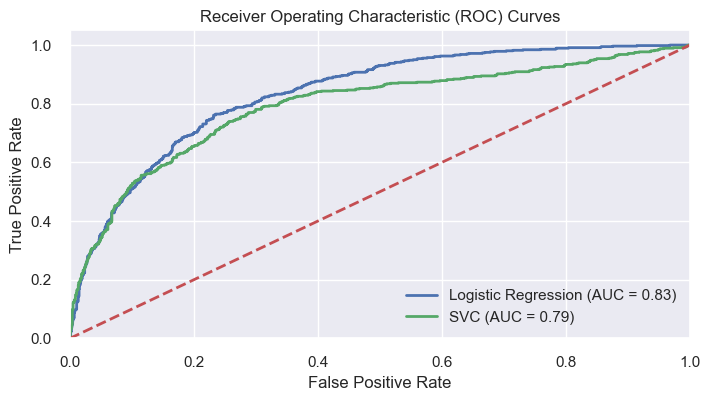

In [15]:
#Plot the ROC curves
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color="b", lw=2, label="Logistic Regression (AUC = {:.2f})".format(roc_auc))
plt.plot(fpr_svc, tpr_svc, color="g", lw=2, label="SVC (AUC = {:.2f})".format(roc_auc_svc))

plt.plot([0, 1], [0, 1], color="r", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.legend()
plt.show()